# Live Camera

In [ ]:
import tensorflow_hub as hub
import cv2
import numpy
import tensorflow as tf
import pandas as pd

# Carregar modelos
detector = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")
labels = pd.read_csv('labels.csv',sep=';',index_col='ID')
labels = labels['OBJECT (2017 REL.)']

cap = cv2.VideoCapture(0)

width = 512
height = 512

while(True):
    #Capture frame-by-frame
    ret, frame = cap.read()
    
    #Resize to respect the input_shape
    inp = cv2.resize(frame, (width , height ))

    #Convert img to RGB
    rgb = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)

    #Is optional but i recommend (float convertion and convert img to tensor image)
    rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)

    #Add dims to rgb_tensor
    rgb_tensor = tf.expand_dims(rgb_tensor , 0)
    
    boxes, scores, classes, num_detections = detector(rgb_tensor)
    
    pred_labels = classes.numpy().astype('int')[0]
    
    pred_labels = [labels[i] for i in pred_labels]
    pred_boxes = boxes.numpy()[0].astype('int')
    pred_scores = scores.numpy()[0]
    #loop throughout the faces detected and place a box around it
    
    for score, (ymin,xmin,ymax,xmax), label in zip(pred_scores, pred_boxes, pred_labels):
        if score < 0.5:
            continue
            
        score_txt = f'{100 * round(score,0)}'
        img_boxes = cv2.rectangle(rgb,(xmin, ymax),(xmax, ymin),(0,255,0),1)      
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img_boxes,label,(xmin, ymax-10), font, 0.5, (255,0,0), 1, cv2.LINE_AA)
        cv2.putText(img_boxes,score_txt,(xmax, ymax-10), font, 0.5, (255,0,0), 1, cv2.LINE_AA)



    #Display the resulting frame
    cv2.imshow('black and white',img_boxes)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


# Static Image

In [2]:
import tensorflow_hub as hub
import cv2
import numpy
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# Apply image detector on a batch of image.
detector = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")

In [7]:

width = 1028
height = 1028

#Load image by Opencv2
img = cv2.imread('image.jpg')
#Resize to respect the input_shape
inp = cv2.resize(img, (width , height ))

#Convert img to RGB
rgb = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)

#Is optional but i recommend (float convertion and convert img to tensor image)
rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)

#Add dims to rgb_tensor
rgb_tensor = tf.expand_dims(rgb_tensor , 0)

#Now you can use rgb_tensor to predict label for exemple :


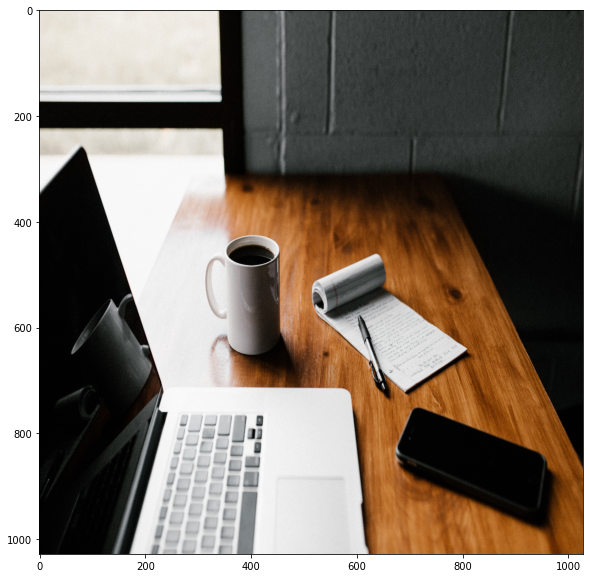

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(rgb)

In [9]:
boxes, scores, classes, num_detections = detector(rgb_tensor)

In [10]:
labels = pd.read_csv('labels.csv',sep=';',index_col='ID')
labels = labels['OBJECT (2017 REL.)']

In [11]:
labels.head()

ID
1        person
2       bicycle
3           car
4    motorcycle
5      airplane
Name: OBJECT (2017 REL.), dtype: object

In [12]:
pred_labels = classes.numpy().astype('int')[0] 
pred_labels = [labels[i] for i in pred_labels]
pred_boxes = boxes.numpy()[0].astype('int')
pred_scores = scores.numpy()[0]

In [13]:
for score, (ymin,xmin,ymax,xmax), label in zip(pred_scores, pred_boxes, pred_labels):
        if score < 0.5:
            continue
            
        score_txt = f'{100 * round(score)}%'
        img_boxes = cv2.rectangle(rgb,(xmin, ymax),(xmax, ymin),(0,255,0),2)      
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img_boxes, label,(xmin, ymax-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)
        cv2.putText(img_boxes,score_txt,(xmax, ymax-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)


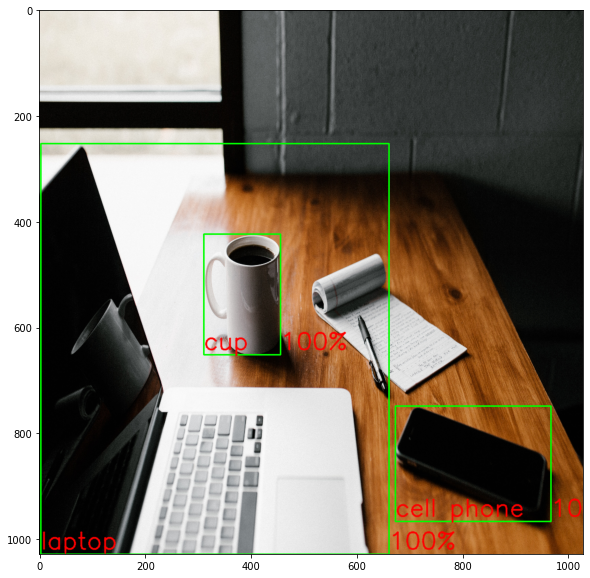

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(img_boxes)

plt.savefig('image_pred.jpg',transparent=True, )